### Import bibliotek

In [92]:
# Importowanie potrzebnych bibliotek
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [93]:
# Wczytanie danych
df = pd.read_csv('drinks.csv')

world = gpd.read_file('World_Countries__Generalized_.shp')

In [94]:
# Wybór krajów na wybraną literę, np. 'A'
selected_countries = df[df['country'].str.startswith('P')]
selected_countries

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
128,Pakistan,0,0,0,0.0
129,Palau,306,63,23,6.9
130,Panama,285,104,18,7.2
131,Papua New Guinea,44,39,1,1.5
132,Paraguay,213,117,74,7.3
133,Peru,163,160,21,6.1
134,Philippines,71,186,1,4.6
135,Poland,343,215,56,10.9
136,Portugal,194,67,339,11.0


In [95]:
# Wygenerowanie statystyk
statistics = selected_countries.describe()
statistics

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,9.000000,9.000000,9.000000,9.000000
mean,179.888889,105.666667,59.222222,6.166667
std,121.357369,71.077423,107.971961,3.723574
min,0.000000,0.000000,0.000000,0.000000
25%,71.000000,63.000000,1.000000,4.600000
50%,194.000000,104.000000,21.000000,6.900000
75%,285.000000,160.000000,56.000000,7.300000
max,343.000000,215.000000,339.000000,11.000000


<Axes: >

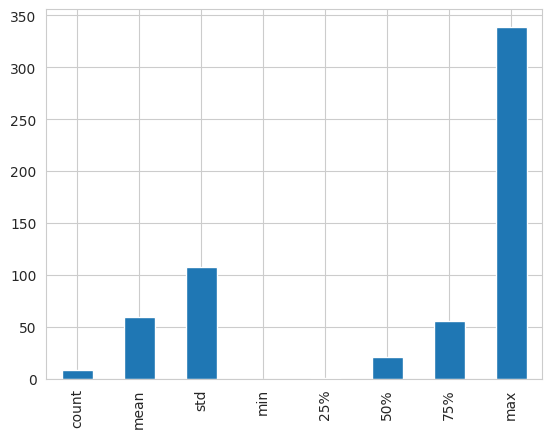

In [96]:
# Wykres słupkowy
statistics['wine_servings'].plot(kind='bar')

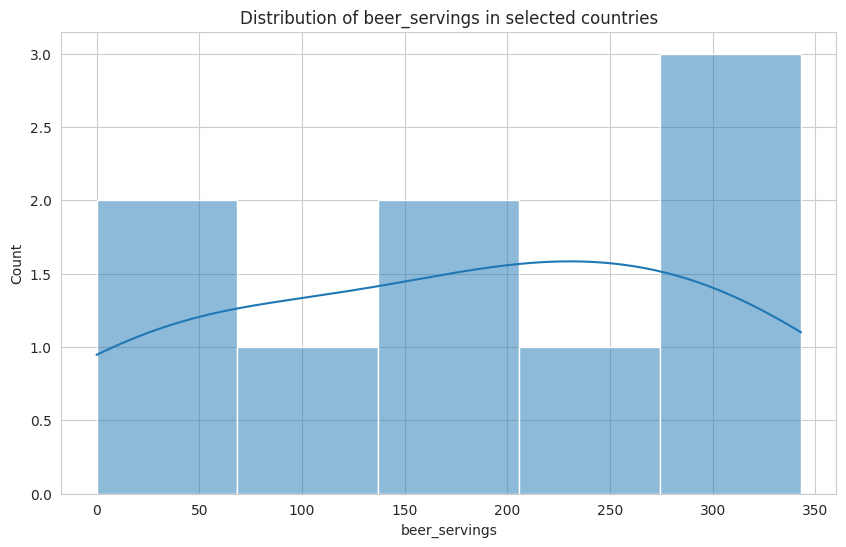

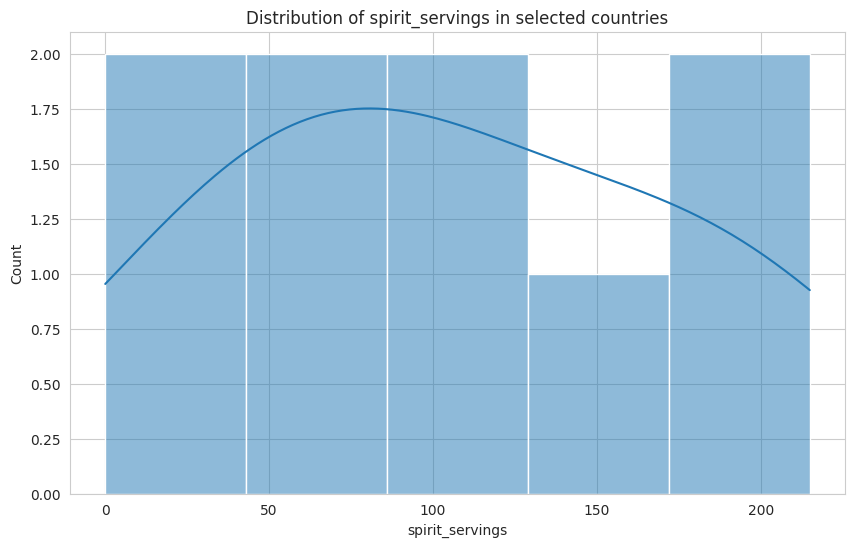

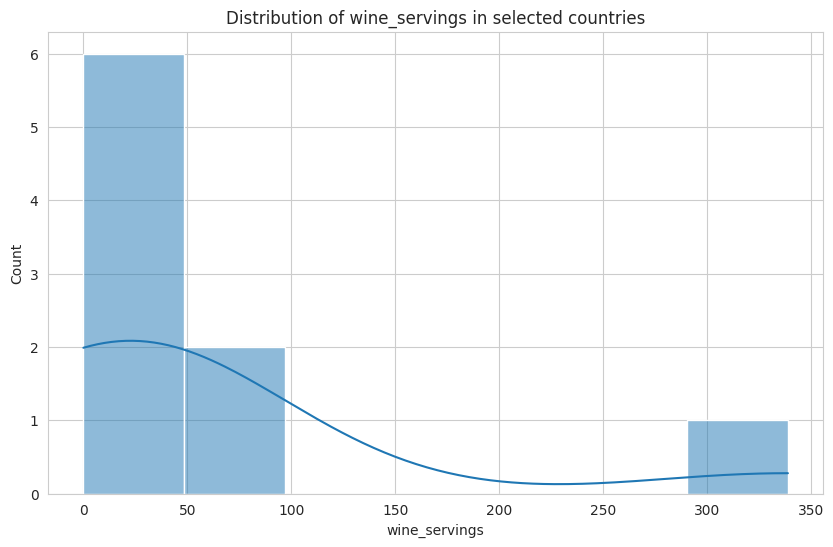

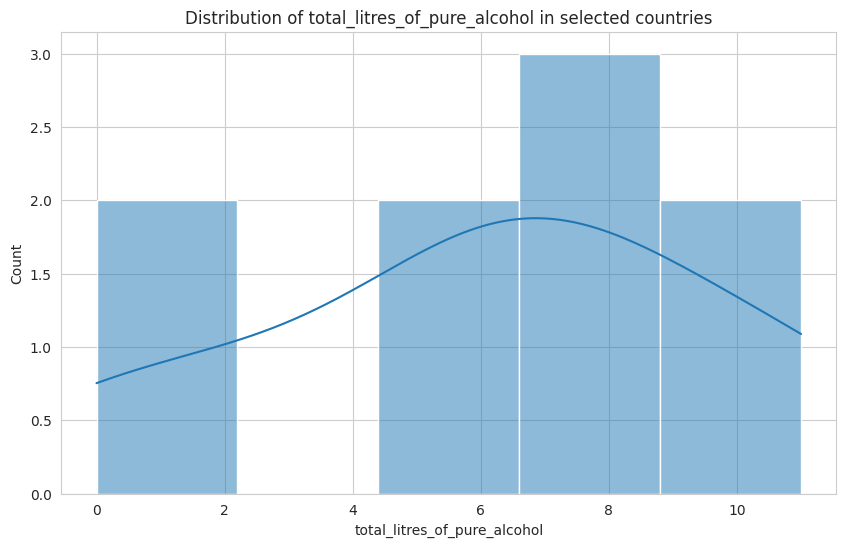

In [97]:
# Wygenerowanie wykresów
for column in selected_countries.columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=selected_countries, x=column, kde=True)
    plt.title(f'Distribution of {column} in selected countries')
    plt.show()

In [98]:
world['COUNTRY'] = world['COUNTRY'].astype(str)
# Połączenie danych geograficznych z danymi statystycznymi
# Utwórz merged_selected dataframe, który zawiera dane z df i world, ale dla wszystkich krajów, które nie znajdują się w selected_countries należy wyzerować wszystkie wartości w wierszach
merged_selected = world.merge(df, left_on='COUNTRY', right_on='country', how='left')
merged_selected

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",Afghanistan,0.0,0.0,0.0,0.0
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569...",Albania,89.0,132.0,54.0,4.9
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...",Algeria,25.0,0.0,14.0,0.7
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",NaN,NaN,NaN,NaN,NaN
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...",Andorra,245.0,138.0,312.0,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ...",Vietnam,111.0,2.0,1.0,2.0
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137...",NaN,NaN,NaN,NaN,NaN
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13...",Yemen,6.0,0.0,0.0,0.1
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096...",Zambia,32.0,19.0,4.0,2.5


In [99]:
merged_selected.loc[
    ~merged_selected['country'].isin(selected_countries['country']), ['beer_servings',
                                                                      'spirit_servings',
                                                                      'wine_servings',
                                                                      'total_litres_of_pure_alcohol']] = None
merged_selected

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",Afghanistan,NaN,NaN,NaN,NaN
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569...",Albania,NaN,NaN,NaN,NaN
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...",Algeria,NaN,NaN,NaN,NaN
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",NaN,NaN,NaN,NaN,NaN
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...",Andorra,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ...",Vietnam,NaN,NaN,NaN,NaN
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137...",NaN,NaN,NaN,NaN,NaN
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13...",Yemen,NaN,NaN,NaN,NaN
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096...",Zambia,NaN,NaN,NaN,NaN


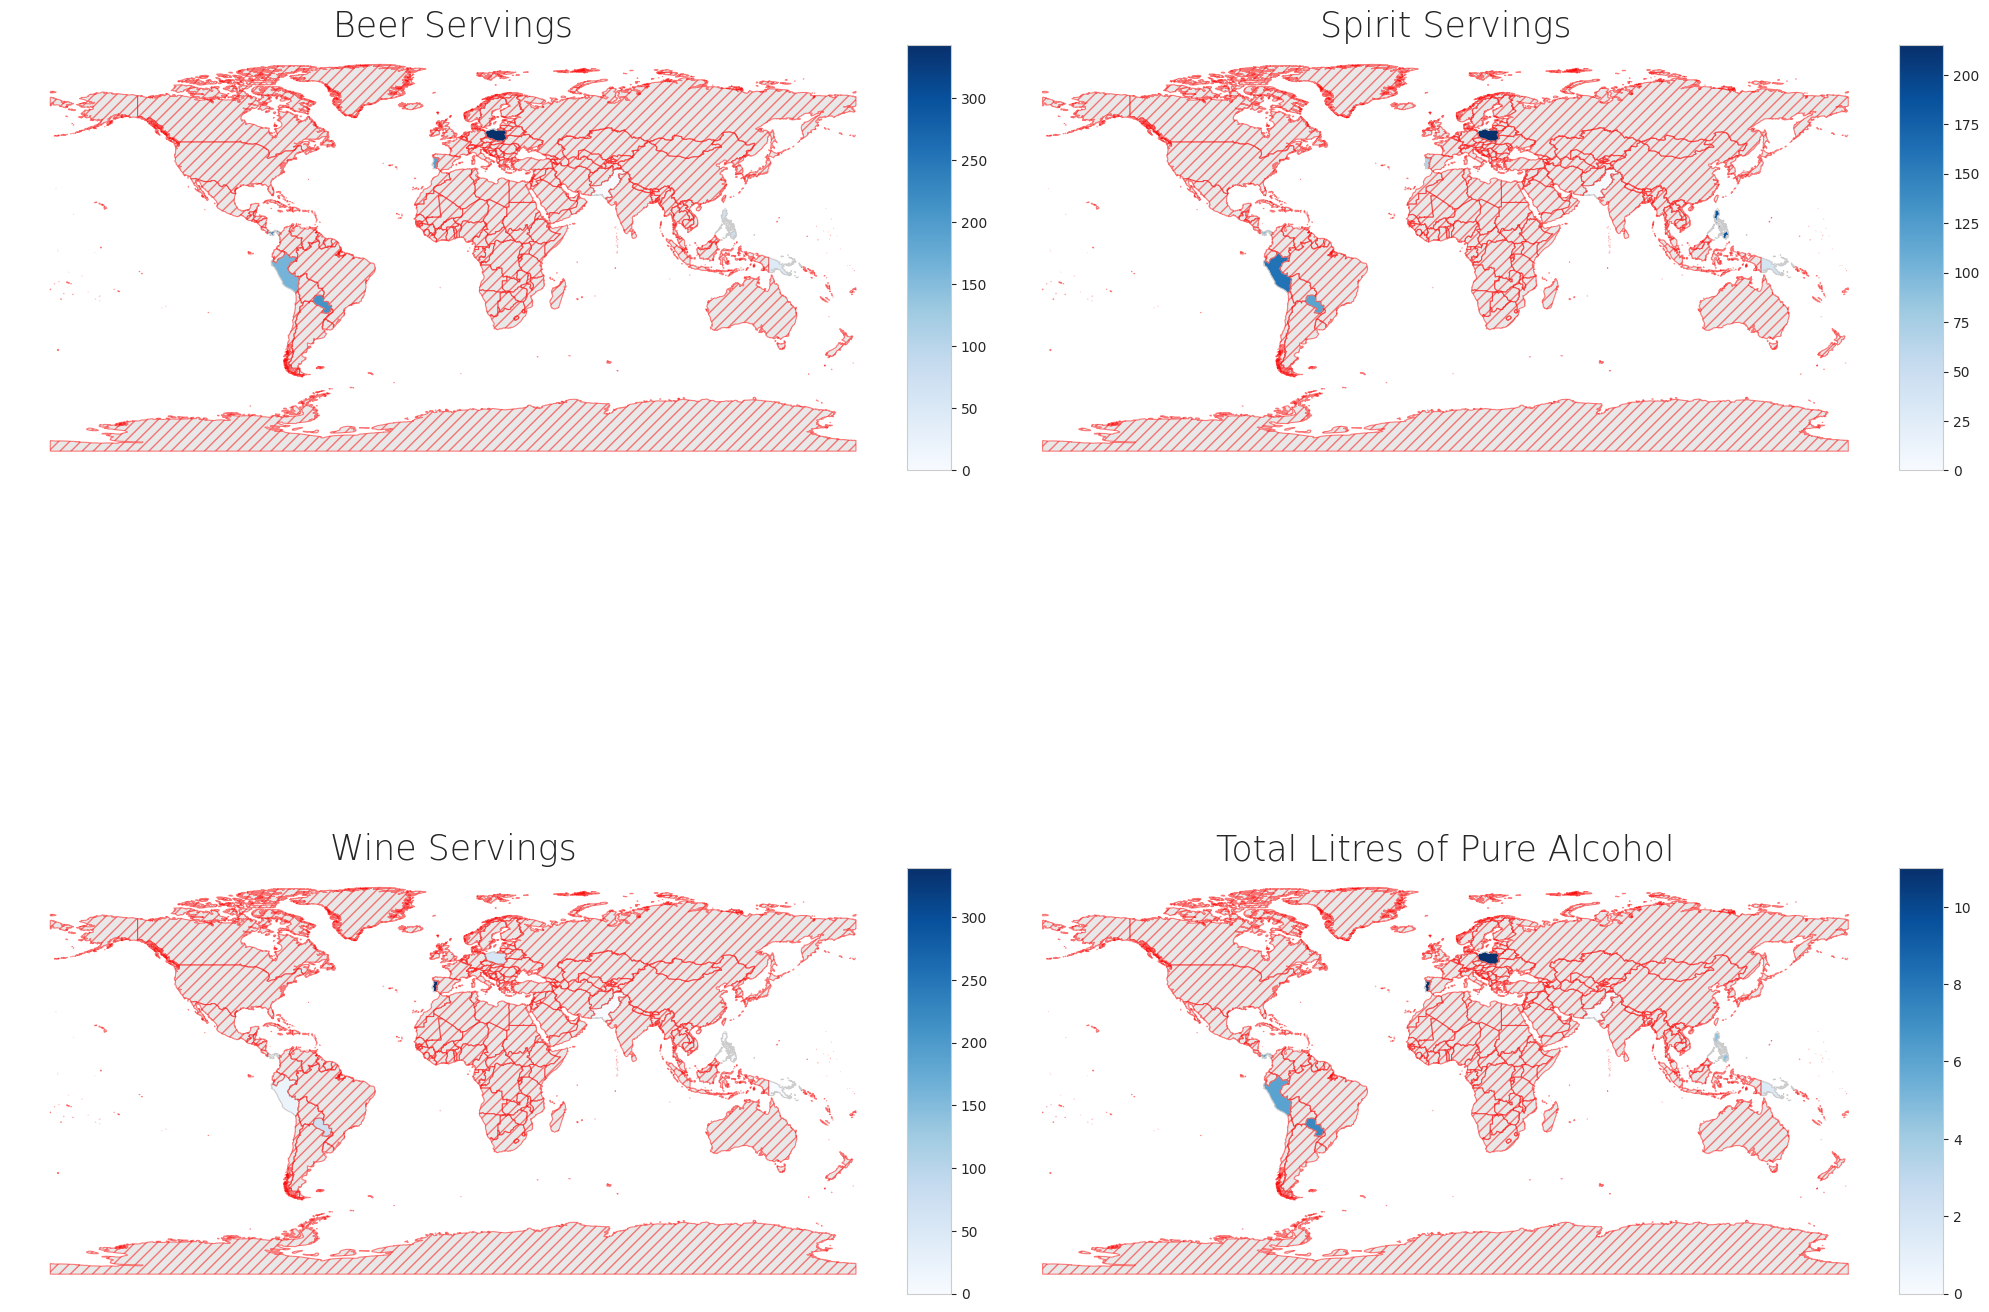

In [100]:
# Wygenerowanie wykresów
sns.set_style('whitegrid')

# Create 4 subplots - total alcohol consumption, beer, wine and spirit
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
# Tworzenie wykresów
variables = ['beer_servings', 'spirit_servings', 'wine_servings',
             'total_litres_of_pure_alcohol']
titles = ['Beer Servings', 'Spirit Servings', 'Wine Servings',
          'Total Litres of Pure Alcohol']

for var, title, ax in zip(variables, titles, axes.flatten()):
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
    ax.axis('off')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    merged_selected.plot(column=var, cmap='Blues', linewidth=0.8, ax=ax,
                         edgecolor='0.8', legend=True, cax=cax, missing_kwds={
            "color": "lightgrey", "label": "Missing values", "edgecolor": "red",
            "hatch": "///", "alpha": 0.5})

plt.tight_layout()
plt.show()